In [20]:
import pandas as pd 
import numpy as np
from numpy import loadtxt
import warnings

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import shap

[[26268.8 3027.0 46 1.691160221]
 [18512.5 3273.0 49 1.817679558]
 [23285.0 1990.0 7 1.104972376]
 [27628.5 3491.0 53 1.93480663]
 [29661.5 4043.5 64 2.256906077]
 [25134.8 3295.5 41 1.827624309]
 [19989.2 2539.5 13 1.409392265]
 [28449.6 3145.0 37 1.751381215]
 [20883.6 3823.5 73 2.12320442]
 [31003.7 2674.5 20 1.493922652]
 [23880.0 2199.5 14 1.221546961]
 [31097.6 2680.0 31 1.490607735]
 [26172.5 2795.0 32 1.549723757]
 [23078.4 3054.5 32 1.693370166]
 [22623.0 2039.0 13 1.138674033]
 [24925.6 1974.0 7 1.100552486]
 [25977.5 3586.0 66 1.987845304]
 [26186.1 2694.5 32 1.495027624]
 [26935.0 2140.0 17 1.191712707]
 [24282.5 3021.5 48 1.679558011]
 [20802.8 3563.5 75 1.980110497]]
MAPE: 0.5066467625431691
RMSE: 20.98124190870177
RMSRE: 0.650726322717071


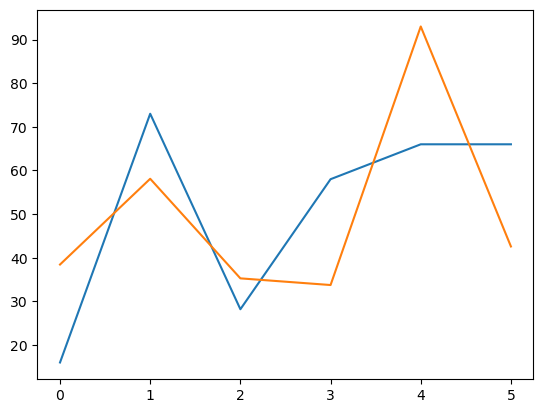

In [135]:
#load data
dataset = pd.read_csv("C:\\Users\\namil\\Downloads\\002data.csv").dropna().to_numpy()
selected_inputs = range(3,7,1)
X = dataset[:,selected_inputs]
Y = dataset[:,8]
print(X)

#split into train and test sets
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#make model
model = XGBRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

#package error calculations
mape = MAPE(y_test, prediction)
print("MAPE:", mape)
mse = MSE(y_test, prediction)
rmse = mse**0.5
print("RMSE:", rmse)

plt.plot(y_test)
plt.plot(prediction)

#sicong's normalized rmse
arr = ((y_test - prediction)/y_test)**2
rmsre = (np.average(arr))**.5
print("RMSRE:", rmsre)

[[2.62350000e+04 2.96050000e+03 5.70000000e+01 1.64143646e+00]
 [2.92927000e+04 3.44750000e+03 8.70000000e+01 1.91049724e+00]
 [2.97730000e+04 6.52250000e+03 1.28000000e+02 3.61325967e+00]
 [2.40191000e+04 3.25100000e+03 7.50000000e+01 1.80552486e+00]
 [2.51600000e+04 4.28650000e+03 1.29000000e+02 2.37790055e+00]
 [2.46710000e+04 5.76900000e+03 1.53000000e+02 3.20276243e+00]
 [1.85054000e+04 4.99500000e+03 1.30000000e+02 2.77071823e+00]
 [2.66362000e+04 3.18000000e+03 7.30000000e+01 1.76685083e+00]
 [2.90033000e+04 4.83300000e+03 1.38000000e+02 2.68784530e+00]
 [2.78909000e+04 4.43200000e+03 1.16000000e+02 2.46353591e+00]
 [2.54253000e+04 4.87700000e+03 1.47000000e+02 2.70441989e+00]
 [2.63004000e+04 3.47500000e+03 9.00000000e+01 1.93370166e+00]
 [1.77338000e+04 3.90800000e+03 9.80000000e+01 2.16961326e+00]
 [2.13379000e+04 3.67600000e+03 9.70000000e+01 2.04033149e+00]
 [2.23875000e+04 6.47850000e+03 1.57000000e+02 3.59005525e+00]
 [1.88596000e+04 5.15700000e+03 1.52000000e+02 2.860220

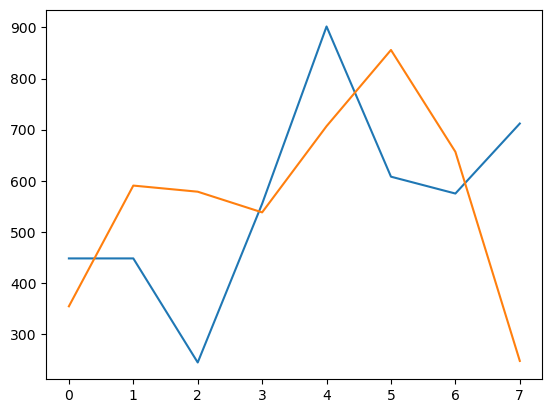

In [28]:
selected_inputs = range(9,13,1)
output = 'calories'


test = pd.read_csv("C:\\Users\\namil\\Documents\\stmi-lab-namila\\allmetrics3")
valid = test[test['dexcom 3hr auc'] != "error"]
X = valid.iloc[:, selected_inputs].to_numpy()
Y = valid[output].to_numpy()

#split into train and test sets
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#make model
model = XGBRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

plt.plot(y_test)
plt.plot(prediction)

#sicong's normalized rmse
arr = ((y_test - prediction)/y_test)**2
rmsre = (np.average(arr))**.5
print("RMSRE:", rmsre)

RMSRE: 0.5784855029923067


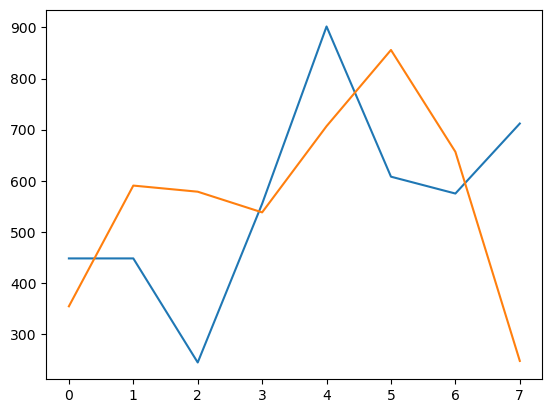

In [55]:
#delete meals w snack nearby
test = pd.read_csv("C:\\Users\\namil\\Downloads\\real.csv")
test = test[test['snack in 3hrs'] == False]

valid = test[test['dexcom 3hr auc'] != "error"]
X = valid.iloc[:, 8:12].to_numpy()
Y = valid['calories'].to_numpy()

#split into train and test sets
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#make model
model = XGBRegressor()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

plt.plot(y_test)
plt.plot(prediction)

#sicong's normalized rmse
arr = ((y_test - prediction)/y_test)**2
rmsre = (np.average(arr))**.5
print("RMSRE:", rmsre)

In [79]:
def basemodel(participant, arr, removesnacks, nodinners):
    #delete meals w snack nearby
#     test = pd.read_csv(f"C:\\Users\\namil\\Documents\\stmi-lab-namila\\allmetrics{participant}")
    test = pd.read_csv(f"C:\\Users\\namil\\Documents\\stmi-lab-namila\\allmetrics{participant}")
    
    if nodinners:
        test = test[test['Meal Type'] != "dinner"]
    
    if removesnacks:
        test = test[test['snack in 3hrs'] == False]

    valid = test[test['dexcom 3hr auc'] != "error"]
    
    #for predicting macros
    #X = valid.loc[:, 'peakheight':'mets 3 hr avg'].to_numpy()
    X = valid.loc[:, 'peakheight':'dexcom 3hr auc'].to_numpy()
    
    #for predicting ppgr 
    #X = valid.iloc[:, 10:18].to_numpy()
    #X = valid.loc[:, 'mets 3 hr auc':'fat'].to_numpy()
    #X = valid.loc[:, 'calories':'fat'].to_numpy()
    Y = valid['calories'].to_numpy().astype(float)
    
    warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


    #split into train and test sets
    seed = 7
    test_size = 0.25
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    #make model
    model = XGBRegressor()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

#     plt.plot(y_test)
#     plt.plot(prediction)
#     plt.show()
    
#     # Fits the explainer
#     explainer = shap.Explainer(model.predict, X_test)
#     # Calculates the SHAP values - It takes some time
#     shap_values = explainer(X_train)
#     #shap.summary_plot(shap_values)
#     shap.plots.bar(shap_values)
    
    #sicong's normalized rmse
    errors = ((y_test - prediction)/y_test)**2
    rmsre = (np.average(errors))**.5
    print("RMSRE:", round(rmsre,7))
    
    arr.append(rmsre)

In [80]:
participants = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,26,27,28,29]
# participants = [2]
rawerrors = []
removederrors = []
drawerrors = []
dremovederrors = []

for x in participants:
    print(x)
    basemodel(x, rawerrors, 0, 1)
    basemodel(x, removederrors, 1, 1)
    basemodel(x, drawerrors, 0, 0)
    basemodel(x, dremovederrors, 1, 0)
    
    
df = pd.DataFrame({'participants': participants, '3 hr raw rmsre': rawerrors, '3hr removed rmsre': removederrors,
                  'dinner raw rmsre': drawerrors, 'dinner removed rmsre': dremovederrors})
df.to_csv("caloriesnoact")

print(f"Average raw error:{np.average(rawerrors)} \nAverage removed error: {np.average(removederrors)} \nAvg dinner raw error: {np.average(drawerrors)}\nAvg dinner removed: {np.average(dremovederrors)}")
print("done!")

1
RMSRE: 0.3692507
RMSRE: 0.675523
RMSRE: 0.5287866
RMSRE: 1.1128129
2
RMSRE: 0.3812087
RMSRE: 0.3812087
RMSRE: 0.4598474
RMSRE: 1.2426164
3
RMSRE: 0.3688975
RMSRE: 0.3688975
RMSRE: 0.8710448
RMSRE: 0.8710448
4
RMSRE: 0.5261152
RMSRE: 0.2821454
RMSRE: 0.406792
RMSRE: 1.0367745
5
RMSRE: 0.4493805
RMSRE: 0.4493805
RMSRE: 0.4139865
RMSRE: 0.4216477
6
RMSRE: 0.3126215
RMSRE: 0.3126215
RMSRE: 1.314077
RMSRE: 1.5056958
7
RMSRE: 0.352026
RMSRE: 0.352026
RMSRE: 1.1842272
RMSRE: 1.1842272
8
RMSRE: 0.3701907
RMSRE: 0.3701907
RMSRE: 0.7130479
RMSRE: 0.7130479
9
RMSRE: 0.4424831
RMSRE: 0.4424831
RMSRE: 0.9560605
RMSRE: 0.8749191
10
RMSRE: 0.3989869
RMSRE: 0.3989869
RMSRE: 0.389406
RMSRE: 0.6070706
11
RMSRE: 0.4216005
RMSRE: 1.0454235
RMSRE: 0.4612194
RMSRE: 1.1509799
12
RMSRE: 0.4387913
RMSRE: 0.4387913
RMSRE: 1.9348832
RMSRE: 2.4166671
13
RMSRE: 0.5042496
RMSRE: 0.5042496
RMSRE: 0.4581435
RMSRE: 0.4409251
14
RMSRE: 0.3711227
RMSRE: 0.3711227
RMSRE: 0.5880133
RMSRE: 0.4488992
15
RMSRE: 0.4400912
R